In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams

In [8]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\Social_Network_Ads.csv")

In [9]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.duplicated().any()

False

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
l=LabelEncoder()

In [15]:
df['Gender']=l.fit_transform(df['Gender'])

In [16]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [17]:
X=df.iloc[:,1:4].values

In [18]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [19]:
y=df.iloc[:,-1].values

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [22]:
sc=StandardScaler()

In [23]:
X=sc.fit_transform(X)

In [24]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(320, 3)

In [28]:
X_test.shape

(80, 3)

In [29]:
dt=DecisionTreeClassifier()

In [31]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=dt.predict(X_test)

In [33]:
a=accuracy_score(y_test,y_pred)

In [34]:
a

0.85

In [35]:
param_dict={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,None]}

In [36]:
param_dict

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid=GridSearchCV(dt,param_grid=param_dict,cv=10,n_jobs=-1)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [40]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [41]:
grid.best_score_

0.9125

In [42]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [44]:
grid.best_params_['criterion']

'gini'

In [45]:
DT=DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],criterion=grid.best_params_['criterion'])

In [46]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [47]:
y_pred_cv=DT.predict(X_test)

In [48]:
a2=accuracy_score(y_test,y_pred_cv)

In [50]:
a2

0.9125

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.654\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.25, 0.5, 'x[2] <= 0.61\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.75, 0.5, 'x[2] <= -0.859\ngini = 0.273\nsamples = 86\nvalue = [14, 72]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.362\nsamples = 59\nvalue = [14, 45]')]

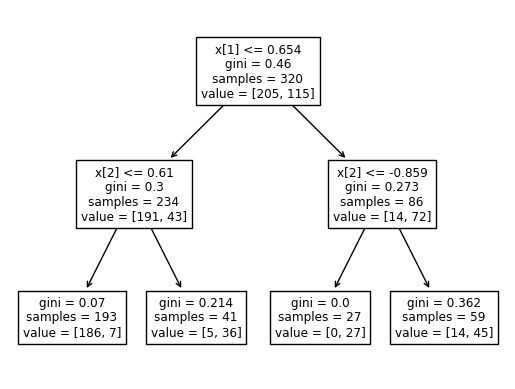

In [51]:
plot_tree(DT)

[Text(0.5238095238095238, 0.9642857142857143, 'x[1] <= 0.654\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.2976190476190476, 0.8928571428571429, 'x[2] <= 0.61\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.16666666666666666, 0.8214285714285714, 'x[1] <= -0.11\ngini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.19047619047619047, 0.75, 'x[2] <= 0.404\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.16666666666666666, 0.6785714285714286, 'x[2] <= -0.066\ngini = 0.165\nsamples = 66\nvalue = [60, 6]'),
 Text(0.14285714285714285, 0.6071428571428571, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.19047619047619047, 0.6071428571428571, 'x[1] <= 0.367\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.11904761904761904, 0.5357142857142857, 'x[2] <= 0.022\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 Text(0.09523809523809523, 0.4642857142857143, 'gini = 0.0\nsamples

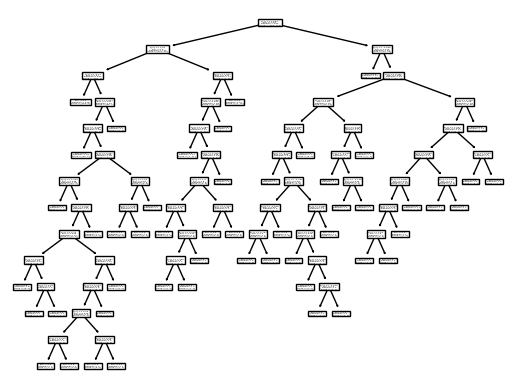

In [52]:
plot_tree(dt)